# ***BRAIN TUMOR SEGMENTATION USING CONVOLUTIONAL NEURAL NETWORK***
> *Brain Tumor is a disease which affects many people in the developing countries. While treatment is possible, it requires an accurate diagnosis first. In these countries projects there are in many cases available X-ray machines (through low-cost projects and donations), but often the radiological expertise is missing for accurately assessing the images.*

* ***Our Job is to build an algorith to classify the x-rays of brain tumor images***

## ***LOADING AND VISUALIZING THE DATA***

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 99% 147M/149M [00:06<00:00, 27.5MB/s]
100% 149M/149M [00:07<00:00, 22.2MB/s]


*We have got the zip file, now let's extract it*

In [3]:
# Extracting the file
import zipfile

zip_ref = zipfile.ZipFile("/content/brain-tumor-mri-dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls Training

glioma	meningioma  notumor  pituitary


*Let's check the length of classes in train and test*

In [6]:
import os
classes = os.listdir("/content/Training")

for class_ in classes:
  l = len(os.listdir(os.path.join("/content/Training", class_)))
  print(f"The length of {class_} class in training is --> {l} ")

for class_ in classes:
  l = len(os.listdir(os.path.join("/content/Testing", class_)))
  print(f"The length of {class_} class in Testing is --> {l} ")

The length of pituitary class in training is --> 1457 
The length of notumor class in training is --> 1595 
The length of meningioma class in training is --> 1339 
The length of glioma class in training is --> 1321 
The length of pituitary class in Testing is --> 300 
The length of notumor class in Testing is --> 405 
The length of meningioma class in Testing is --> 306 
The length of glioma class in Testing is --> 300 


## ***VISUALIZING THE DATA WITH MATPLOTLIB***

#### **HELPER FUNCTION 1 --> VISUALIZE IMAGES**

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

classes = os.listdir("/content/Training")

def view_random_images(target_dir, class_names):
  try:
    target_folder = target_dir + class_names

    plt.figure(figsize=(15,13))
    for i in range(1, 5):
      plt.subplot(2, 2, i)
      random_image = random.sample(os.listdir(target_folder), 1)[0]
      img = mpimg.imread(target_folder + "/" + random_image)
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis("off");
  except Exception as e:
    print("GOT AN ERROR" , e)
  finally:
    print("EXECUTION SUCCESSFULL")


***Let's visualize some images with no tumor***

EXECUTION SUCCESSFULL


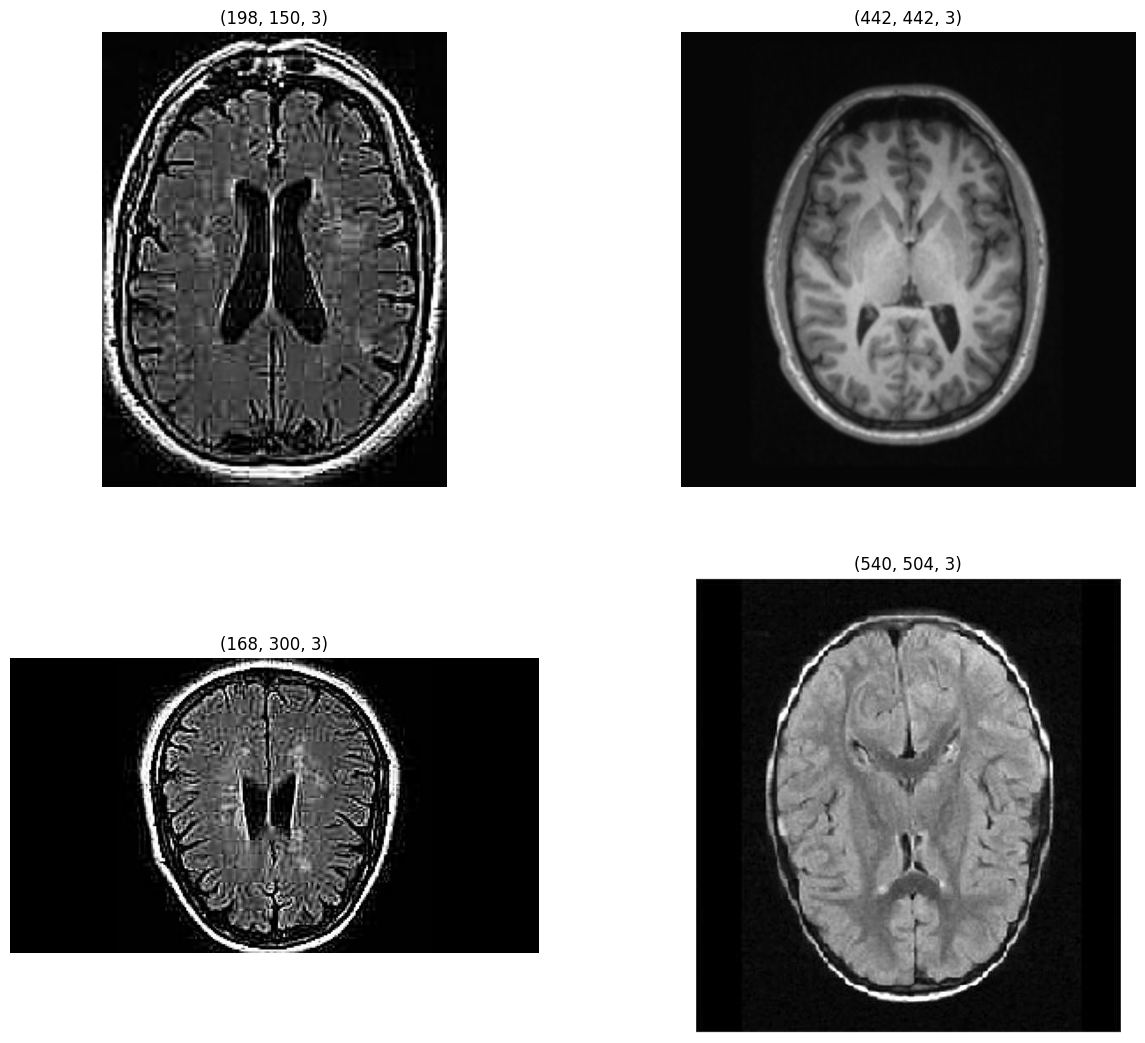

In [8]:
view_random_images("/content/Training/","notumor")

***Let's visualize some images with tumor***

EXECUTION SUCCESSFULL


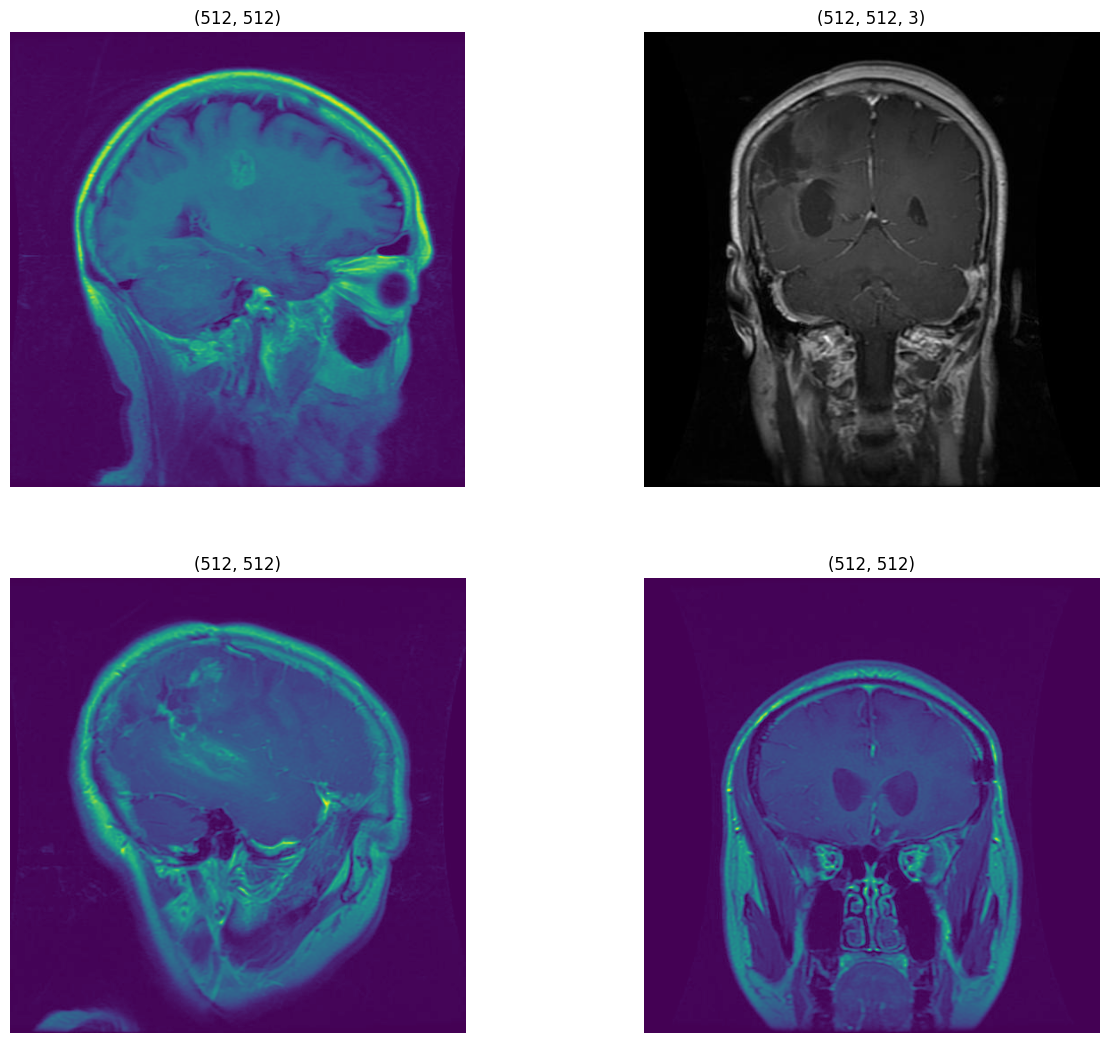

In [9]:
view_random_images("/content/Training/","glioma")

> **`NOTE` - HERE BY NORMAL EYES WE CANNOT FIND MUCH DIFFRENCES, BUT THE CNN MODEL WHICH GOES INTO MINUTE DETAILS WILL BE ABLE TO CLASSIFY**

## ***PREPARING THE DATA***

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/Training"
test_dir = "/content/Testing"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               seed = 42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size= 32,
                                             target_size = (224, 224),
                                             class_mode = "categorical",
                                             seed = 42)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [11]:
print(f"The length of train_Data = {len(train_data)}")
print(f"The length of test_data = {len(test_data)}")

The length of train_Data = 179
The length of test_data = 41


In [46]:
train_data[0][0]

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

## ***MODELLING EXPERIMENTS ->***
1. `MODEL 0` - Baseline model, only Conv2D and MaxPool2D layers
2. `MODEL 1` - CNN model with more layers like Dropout, BatchNormalization etc.
3. `MODEL 2` - CNN model with data augmentation
4. `MODEL 3` - Tensorflow Hub model

## ***MODEL 0 --> MAKING THE BASELINE MODEL***
Let's now make our baseline model, a simple CNN model with only Conv2D and MaxPool2D layers

In [12]:
import tensorflow as tf

# Setting the random seed for reproducability
tf.random.set_seed(42)

# The model 0 -
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = (2, 2),
                           strides = (1, 1),
                           padding = "same",
                           input_shape = (224, 224, 3),
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = "softmax")
])

# Compilng the model
model_0.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fitting in the model
history_0 = model_0.fit(x = train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
179/179 [==============================] - 29s 90ms/step - loss: 0.8182 - accuracy: 0.6590 - val_loss: 0.7184 - val_accuracy: 0.7323
Epoch 2/10
179/179 [==============================] - 18s 102ms/step - loss: 0.5121 - accuracy: 0.8171 - val_loss: 0.6809 - val_accuracy: 0.7506
Epoch 3/10
179/179 [==============================] - 16s 90ms/step - loss: 0.4305 - accuracy: 0.8470 - val_loss: 0.5760 - val_accuracy: 0.7765
Epoch 4/10
179/179 [==============================] - 19s 104ms/step - loss: 0.3893 - accuracy: 0.8631 - val_loss: 0.4795 - val_accuracy: 0.8169
Epoch 5/10
179/179 [==============================] - 16s 87ms/step - loss: 0.3297 - accuracy: 0.8780 - val_loss: 0.5187 - val_accuracy: 0.8047
Epoch 6/10
179/179 [==============================] - 16s 92ms/step - loss: 0.3090 - accuracy: 0.8901 - val_loss: 0.4294 - val_accuracy: 0.8360
Epoch 7/10
179/179 [==============================] - 17s 93ms/step - loss: 0.2731 - accuracy: 0.8964 - val_loss: 0.3868 - val_accurac

#### ***HELPER FUNCTION 2 - PLOT THE EVALUATION CURVES FOR MODELS***

> ***WHAT ARE LOSS CURVES ?***
--> Loss curves give us the insights about the performance of the model.


`loss`
* Decresing loss is a good sign
* Decreasing training loss and increasing validation loss means overfitting
* All losses increasing means bad performances
* maxima or minima means the model reached its max capacity
* both losses going together means model is success


`accuracy`
* Increasing accuracy means success
* decresing accuracy means model does not perform well
* Decreasing training accuracy, increasing validation accuracy or vice versa --> overfitting
* maxima minima means model has reached its max capacity
* high training accuracy low val accuracy --> ovrefitting

In [13]:
def eval_curves(history):
  training_loss = history.history["loss"]
  training_accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(1, len(training_accuracy) + 1 )

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, training_loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Training and Validation Loss")
  plt.legend()

  # Plot training and validation accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, training_accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.legend()

  plt.tight_layout()
  plt.show()

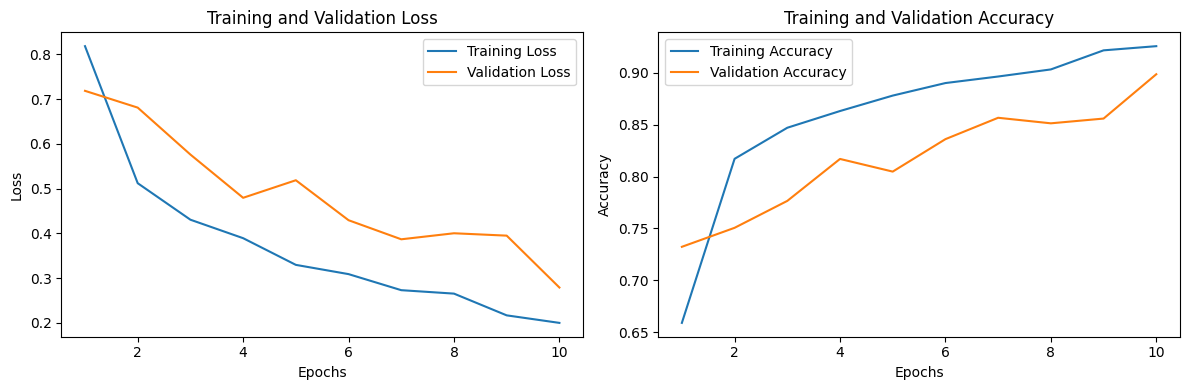

In [14]:
eval_curves(history_0)

In [15]:
model_0_baseline = {
    'accuracy' : 83.75,
    'loss':44.21
}

> ***Our baseline model is performing pretty well. But I once heard from Mrd Bourke (a big ML practitioner) that a machine learner's motto is to build --> evaluate --> test --> build better.  So Let's try to beat our baseline with another modelling experiments***

## ***MODEL 1 --> MORE COMPLEX MODEL***
Let's now try a modelling experiment and beat our baseline. Tho our model is not overfitting, we will add batch normalization and weight regularization to check how our data runs on a more complex model.

In [16]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
     tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), strides = (2, 2),padding = "same", input_shape = (224, 224, 3), activation = "relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), strides = (2, 2),padding = "same", activation = "relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
     tf.keras.layers.Dropout(0.50),

     tf.keras.layers.Conv2D(filters = 128, kernel_size = (2, 2), strides = (2, 2),padding = "same", activation = "relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.50),

     tf.keras.layers.Dense(4, activation = "softmax")
])

model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_1 = model_1.fit(x = train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/20
179/179 [==============================] - 19s 90ms/step - loss: 2.9817 - accuracy: 0.5737 - val_loss: 5.4165 - val_accuracy: 0.2288
Epoch 2/20
179/179 [==============================] - 18s 101ms/step - loss: 1.8473 - accuracy: 0.6898 - val_loss: 2.2578 - val_accuracy: 0.5141
Epoch 3/20
179/179 [==============================] - 16s 87ms/step - loss: 1.2802 - accuracy: 0.7374 - val_loss: 1.6196 - val_accuracy: 0.5789
Epoch 4/20
179/179 [==============================] - 16s 89ms/step - loss: 0.9887 - accuracy: 0.7600 - val_loss: 1.1758 - val_accuracy: 0.6781
Epoch 5/20
179/179 [==============================] - 17s 93ms/step - loss: 0.8306 - accuracy: 0.7904 - val_loss: 0.7783 - val_accuracy: 0.7735
Epoch 6/20
179/179 [==============================] - 15s 85ms/step - loss: 0.7436 - accuracy: 0.7976 - val_loss: 0.6898 - val_accuracy: 0.7872
Epoch 7/20
179/179 [==============================] - 17s 94ms/step - loss: 0.6567 - accuracy: 0.8221 - val_loss: 0.6569 - val_accuracy

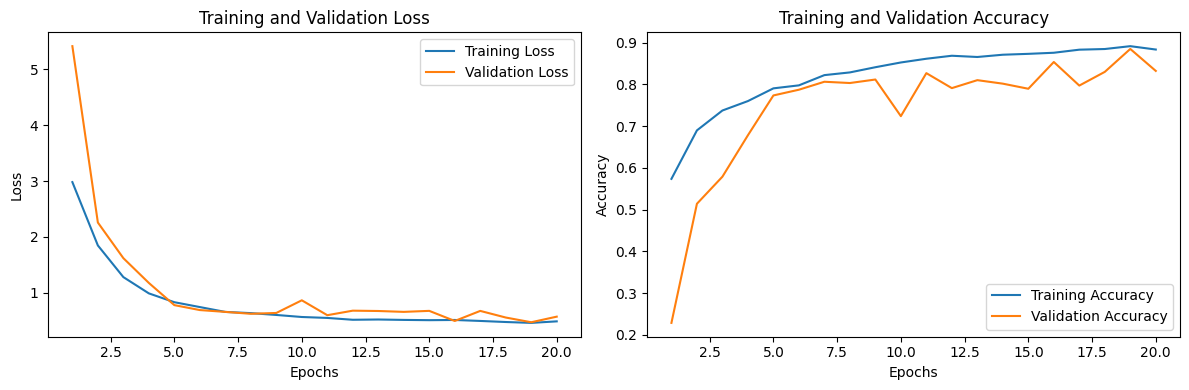

In [17]:
eval_curves(history_1)

In [18]:
model_1_results= {
    'accuracy' : 82.53,
    'loss': 44.93,
}


In [19]:
model_results = {
    'basline_model_0' : model_0_baseline,
    'model_1' : model_1_results
}

model_results

{'basline_model_0': {'accuracy': 83.75, 'loss': 44.21},
 'model_1': {'accuracy': 82.53, 'loss': 44.93}}

> ***Seems like our bsaline model performs better than the model 1 even with half as many iterations and comparitely lower complexity than model 0. Let's Now do another experiment, let's try data augmentation and see what the results look like.***



## ***MODEL 2 --> DATA AUGMENTATION***
> So data augmentation is basically the process of editing the images (not photoshop type of...)  to add more variety to the dataset. Let's augment the images from tf imagedatagenerator library and vidualize them.

In [20]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.5,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=False)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True)

Found 5712 images belonging to 4 classes.


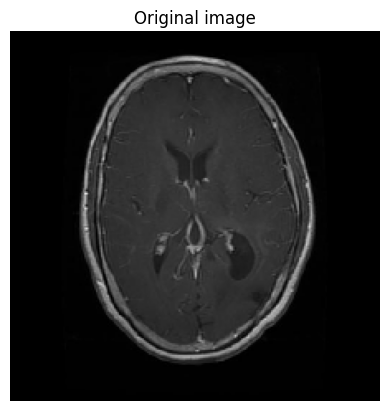

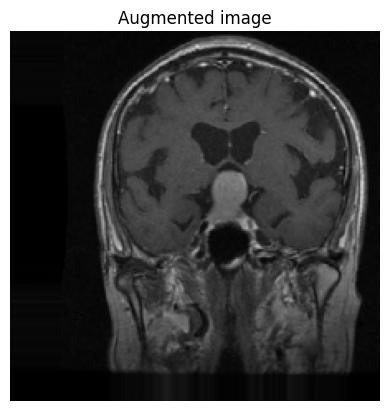

In [21]:
import random

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

**Let's Build a model 2 for these augmented images.**

In [22]:
tf.random.set_seed(42)

model_2_augmented = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), strides = (1, 1), padding = "same", input_shape = (224, 224, 3),activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = (2,2 )),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(4, activation = "softmax")
])


model_2_augmented.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_2 = model_2_augmented.fit(x = train_data_augmented,
                        epochs = 20,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/20
179/179 [==============================] - 80s 430ms/step - loss: 1.1655 - accuracy: 0.4561 - val_loss: 0.9601 - val_accuracy: 0.6285
Epoch 2/20
179/179 [==============================] - 79s 439ms/step - loss: 0.9112 - accuracy: 0.6236 - val_loss: 0.9702 - val_accuracy: 0.6354
Epoch 3/20
179/179 [==============================] - 75s 421ms/step - loss: 0.8289 - accuracy: 0.6709 - val_loss: 0.8907 - val_accuracy: 0.6705
Epoch 4/20
179/179 [==============================] - 77s 429ms/step - loss: 0.7390 - accuracy: 0.7055 - val_loss: 0.9448 - val_accuracy: 0.6270
Epoch 5/20
179/179 [==============================] - 76s 422ms/step - loss: 0.7000 - accuracy: 0.7208 - val_loss: 0.9697 - val_accuracy: 0.6354
Epoch 6/20
179/179 [==============================] - 76s 427ms/step - loss: 0.6740 - accuracy: 0.7372 - val_loss: 1.1451 - val_accuracy: 0.5858
Epoch 7/20
179/179 [==============================] - 77s 432ms/step - loss: 0.6430 - accuracy: 0.7472 - val_loss: 0.7870 - val_ac

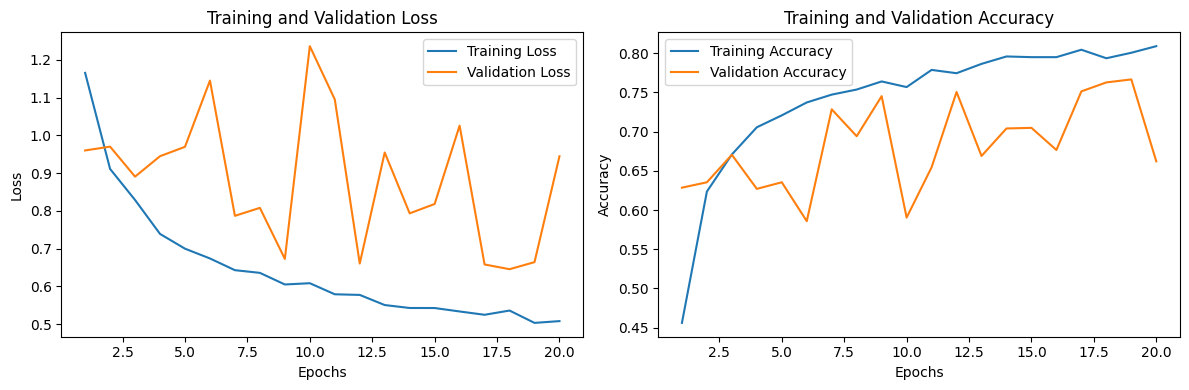

In [23]:
eval_curves(history_2)

In [24]:
model_2_results= {
    'accuracy' : 79.56 ,
    'loss': 56.02,
}
model_2_results

{'accuracy': 79.56, 'loss': 56.02}

> ***This model also nearly touches the predictions of baseline model. Let's Try another machine learning experiment, using 'TRANSFER LEARNING'***

## ***MODEL 3,4 - TRANSFER LEARNING***
> So Transfer learning is the proces of leveraging pre-trained models for our use case. The pre-trained models are created by the big data science and ml companies which have smart men to produce good outcomes. Those models are a result of great calculations and experiments.


> Using These pre-trained model can give us better results than the normal Sequential Models. So let's start.

#### ***HELPER FUNCTION 3 --> CREATE TENSORBOARD CALLBACKS***

In [25]:
# Create a tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

'''
CALLBACKS are functionality we can add to our models which occur during
training. Like adding checkpoints to get the points where the performances of
model peaked or to get the point performances of the model throughout.
'''

'\nCALLBACKS are functionality we can add to our models which occur during\ntraining. Like adding checkpoints to get the points where the performances of\nmodel peaked or to get the point performances of the model throughout.\n'

`EfficientNet - ` a state of the art computer vision architecture from 2019. It helps achieve better results than the conv models.
* It has over 236 layers

In [26]:
import tensorflow as tf
import tensorflow_hub as hub

In [27]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [28]:
def create_model(model_url, num_classes=4, IMAGE_SHAPE=(224, 224)):
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [29]:
efficient_net_model = create_model(efficientnet_url, num_classes=4)

efficient_net_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

efficient_net_history = efficient_net_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tf_hub_models",
                                                                         experiment_name="efficient_net")])

Saving TensorBoard log files to: tf_hub_models/efficient_net/20231012-014631
Epoch 1/10
179/179 [==============================] - 31s 113ms/step - loss: 0.5740 - accuracy: 0.8029 - val_loss: 0.4489 - val_accuracy: 0.8230
Epoch 2/10
179/179 [==============================] - 18s 100ms/step - loss: 0.3331 - accuracy: 0.8859 - val_loss: 0.3639 - val_accuracy: 0.8497
Epoch 3/10
179/179 [==============================] - 18s 98ms/step - loss: 0.2778 - accuracy: 0.9079 - val_loss: 0.3174 - val_accuracy: 0.8703
Epoch 4/10
179/179 [==============================] - 18s 100ms/step - loss: 0.2466 - accuracy: 0.9181 - val_loss: 0.2832 - val_accuracy: 0.8879
Epoch 5/10
179/179 [==============================] - 22s 124ms/step - loss: 0.2244 - accuracy: 0.9240 - val_loss: 0.2794 - val_accuracy: 0.8932
Epoch 6/10
179/179 [==============================] - 20s 111ms/step - loss: 0.2045 - accuracy: 0.9321 - val_loss: 0.2582 - val_accuracy: 0.9008
Epoch 7/10
179/179 [==============================] - 

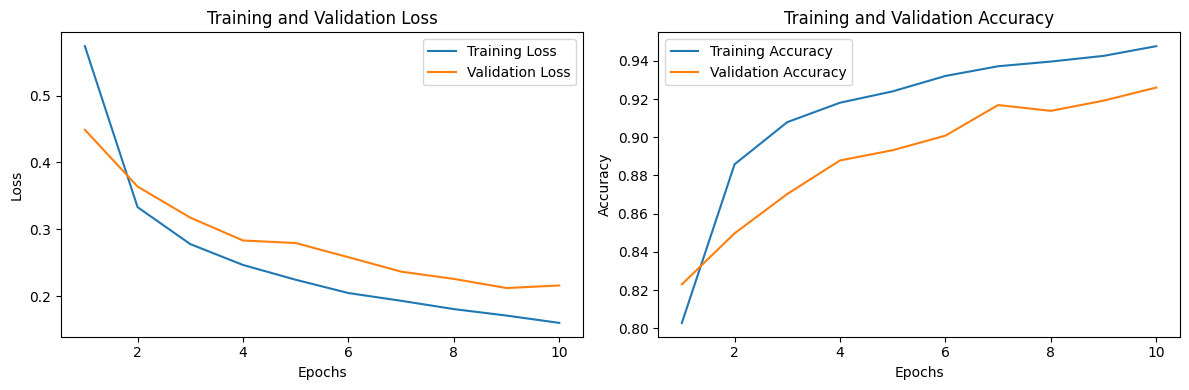

In [30]:
eval_curves(efficient_net_history)

In [31]:
efficient_net_results= {
    'accuracy' : 92.68 ,
    'loss': 20.75,
}

> ***As we were expecting, the efficientnet model runs very nicely and beats all the models with a very fine margins. Let's try another tf hub model before running predictions***

`RESNET_MODEL - ` has over 50-200 layers ranging on the version

In [32]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

resnet_model = create_model(resnet_url, num_classes=4)

resnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tf_hub_models",
                                                                         experiment_name="resnet_net")])

Saving TensorBoard log files to: tf_hub_models/resnet_net/20231012-015024
Epoch 1/10
179/179 [==============================] - 29s 133ms/step - loss: 0.4769 - accuracy: 0.8270 - val_loss: 0.3960 - val_accuracy: 0.8497
Epoch 2/10
179/179 [==============================] - 21s 117ms/step - loss: 0.2701 - accuracy: 0.9086 - val_loss: 0.3189 - val_accuracy: 0.8818
Epoch 3/10
179/179 [==============================] - 21s 114ms/step - loss: 0.2136 - accuracy: 0.9296 - val_loss: 0.2504 - val_accuracy: 0.9077
Epoch 4/10
179/179 [==============================] - 21s 116ms/step - loss: 0.1755 - accuracy: 0.9421 - val_loss: 0.2407 - val_accuracy: 0.9100
Epoch 5/10
179/179 [==============================] - 21s 114ms/step - loss: 0.1575 - accuracy: 0.9489 - val_loss: 0.2163 - val_accuracy: 0.9237
Epoch 6/10
179/179 [==============================] - 20s 114ms/step - loss: 0.1382 - accuracy: 0.9580 - val_loss: 0.2076 - val_accuracy: 0.9222
Epoch 7/10
179/179 [==============================] - 21

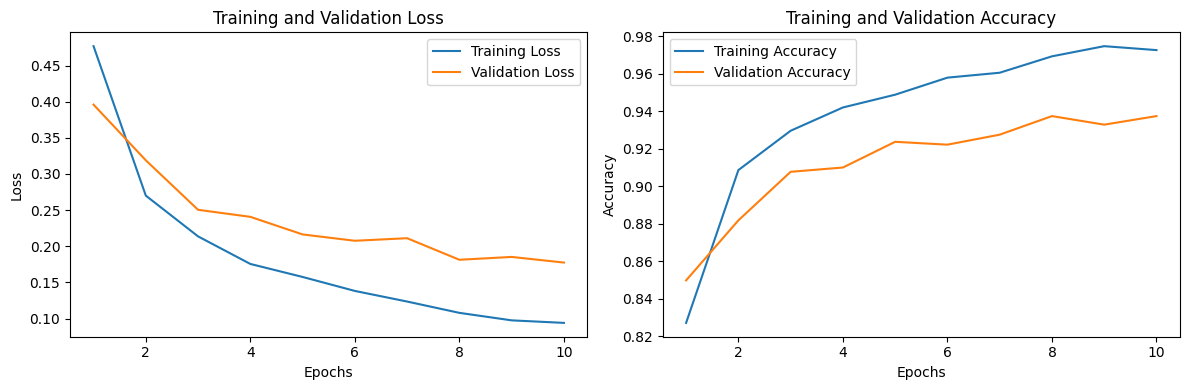

In [33]:
eval_curves(resnet_history)

In [34]:
resnet_results= {
    'accuracy' : 93.52 ,
    'loss': 18.43,
}

> ***This model also gives us satisfactory results as we wanted.***

## ***COMPARING THE RESULTS***

In [35]:
all_model_results = {
    'baseline_model_0' : model_0_baseline,
    'model_1' : model_1_results,
    'model_2 - augmented' : model_2_results,
    'efficient_net_model' : efficient_net_results,
    'reset_model' : resnet_results

}
all_model_results

{'baseline_model_0': {'accuracy': 83.75, 'loss': 44.21},
 'model_1': {'accuracy': 82.53, 'loss': 44.93},
 'model_2 - augmented': {'accuracy': 79.56, 'loss': 56.02},
 'efficient_net_model': {'accuracy': 92.68, 'loss': 20.75},
 'reset_model': {'accuracy': 93.52, 'loss': 18.43}}

In [36]:
import pandas as pd
all_model_results_df = pd.DataFrame(all_model_results)
all_model_results_df = all_model_results_df.transpose()
all_model_results_df

,accuracy,loss
baseline_model_0,83.75,44.21
model_1,82.53,44.93
model_2 - augmented,79.56,56.02
efficient_net_model,92.68,20.75
reset_model,93.52,18.43


In [37]:
all_model_results_df["accuracy"] =  all_model_results_df["accuracy"]/100
all_model_results_df["loss"] =  all_model_results_df["loss"]/100

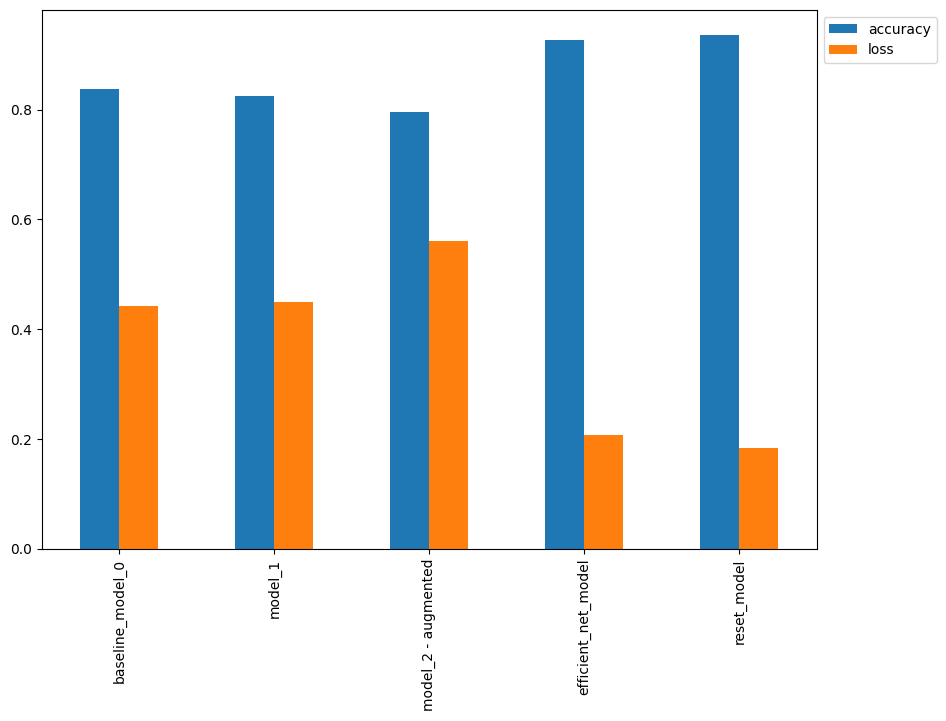

In [38]:
# Plot and compare all of the model results
all_model_results_df.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

## ***SAVING MODELS AND MAKING PREDICTIONS***

In [39]:
efficient_net_model.save('efficient_net_model.h5')
resnet_model.save('resnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
model_0.save('model_0_baseline.keras')
model_1.save('model_1.baseline.keras')
model_2_augmented.save('model_2_augmented.keras')
efficient_net_model.save('efficient_net_model.keras')
resnet_model.save('resnet_model.keras')

#### ***HELPER FUNCTION 4 --> PREPARE IMAGES TO PASS IN MODEL***
> ***In this step we are going to prepare the images to pass in the model.***

In [41]:
# Create a function to import an image and resize it to be able to be used with our model
def prepare_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return tf.expand_dims(img, axis=0)



>#### ***HELPER FUNCTION 5 --> PREDICT AND GIVE THE CLASSNAME***

In [43]:
import numpy as np

def predict_class(model, image):
  classes = ["GILOMA", "MENINGIOMA", "NO TUMOR", "PITUTIARY"]
  predictions = model.predict(image)
  predicted_class = np.argmax(predictions)

  return classes[predicted_class - 1]

> **GILIOMA IMAGE PREDICTION**